In [24]:
import os
import pandas as pd
import re
# Obtener el directorio de trabajo actual
directorio_actual = os.getcwd()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Mostrar el directorio
print("El directorio de trabajo actual es:", directorio_actual)


El directorio de trabajo actual es: g:\Unidades compartidas\Rocío doctorado\Proyecto NLP\Códigos


In [4]:
datos_junio=pd.read_csv('g:/Unidades compartidas/Rocío doctorado/Proyecto NLP/Datos/tweets_junio_procesado.csv',  encoding='utf8')

Extraemos las menciones y detectamos los retweet

In [5]:
# Función para extraer menciones
def extraer_mencion(texto):
    # Busca menciones con @ seguido de palabras
    mencion = re.findall(r'@(\w+)', texto) 
    return mencion if mencion else None  # Devuelve None si no hay menciones

# Función para detectar si es un retweet
def es_retweet(texto):
    return texto.startswith('RT')  # Retorna True si el texto empieza con 'RT'

# Crear nuevas columnas 'mencion' y 'retweet'
datos_junio['mencion'] = datos_junio['full_text'].apply(extraer_mencion)  # Aplica la función de extracción
datos_junio['retweet'] = datos_junio['full_text'].apply(es_retweet)  # Aplica la función para retweets

# Mostrar el DataFrame actualizado
datos_junio[['full_text', 'mencion', 'retweet']]


,full_text,mencion,retweet
0,RT @PTSarg: Contamos con una ventaja que ellos...,[PTSarg],True
1,RT @juanabalmedina: Excelentes reflexiones de ...,[juanabalmedina],True
2,En el fondo lo que les jode es nuestra liberta...,None,False
3,holla! me gustaría q ayuden a esta junta d fir...,"[DiputadosAR, ChangeorgAR]",False
4,RT @femialborto: A vos que decís #Salvemoslasd...,[femialborto],True
...,...,...,...
1041580,RT @JuanFaerman: Aranguren y Cabrera: los prim...,[JuanFaerman],True
1041581,RT @NoAlAborto19: @danielscioli me bloqueo por...,"[NoAlAborto19, danielscioli]",True
1041582,RT @marianoobarrio: Esta inmensa maravilla fue...,[marianoobarrio],True
1041583,RT @aciprensa: El Cardenal Dolan de Nueva York...,"[aciprensa, CardinalDolan]",True


In [6]:
datos_junio.head()

,retweet_count,full_text,posicion,user_name,user_id,mencion,retweet
0,14,RT @PTSarg: Contamos con una ventaja que ellos...,si,Luciana HL,3130302891,[PTSarg],True
1,59,RT @juanabalmedina: Excelentes reflexiones de ...,si,Oriana Ribeiro,383350997,[juanabalmedina],True
2,0,En el fondo lo que les jode es nuestra liberta...,si,Luz Scarpati,2999619141,None,False
3,0,holla! me gustaría q ayuden a esta junta d fir...,si,gigi not hadid,3668114236,"[DiputadosAR, ChangeorgAR]",False
4,308,RT @femialborto: A vos que decís #Salvemoslasd...,si,niña de tilcara🌰,828222093804371968,[femialborto],True


In [7]:
df_users_junio =  pd.read_excel('g:/Unidades compartidas/Rocío doctorado/Proyecto NLP/Datos/aborto_junio_users.xlsx')

Agregamos una nueva columna correspondiente a user_name_mencion

In [8]:
# Crear un diccionario para buscar rápidamente los nombres
nombre_dict = dict(zip(df_users_junio['screen_name'], df_users_junio['name']))

# Función para obtener los nombres de las menciones
def obtener_nombres_mencion(menciones):
    if menciones is None:  # Verificar si menciones es None
        return None  # Retorna una lista vacía si no hay menciones
    if not isinstance(menciones, list):  # Verificar si menciones es una lista
        return None  # Retorna una lista vacía si no es una lista válida
    # Retorna una lista de nombres o el screen_name si no hay coincidencia
    return [nombre_dict.get(mencion, mencion) for mencion in menciones]

# Aplicar la función a la columna 'mencion' y crear la nueva columna
datos_junio['user_name_mencion'] = datos_junio['mencion'].apply(obtener_nombres_mencion)

# Mostrar el DataFrame actualizado
datos_junio[[ 'mencion', 'user_name_mencion', 'user_name']]

,mencion,user_name_mencion,user_name
0,[PTSarg],[PTS],Luciana HL
1,[juanabalmedina],[Juan Abal Medina],Oriana Ribeiro
2,None,None,Luz Scarpati
3,"[DiputadosAR, ChangeorgAR]","[DiputadosAR, ChangeorgAR]",gigi not hadid
4,[femialborto],[Abortencia],niña de tilcara🌰
...,...,...,...
1041580,[JuanFaerman],[Juan Faerman],Hernán Gavinoser
1041581,"[NoAlAborto19, danielscioli]","[No Al Aborto, danielscioli]",Soldado anonimo
1041582,[marianoobarrio],[mariano obarrio],Líbranos_del_Mal
1041583,"[aciprensa, CardinalDolan]","[ACI Prensa, CardinalDolan]",Susana B.T. #iMision


In [9]:
datos_junio['user_name_mencion'].head(10)

0                                 [PTS]
1                    [Juan Abal Medina]
2                                  None
3            [DiputadosAR, ChangeorgAR]
4                          [Abortencia]
5                   [Silvia Lospennato]
6                                  None
7                  [#13JAbortoLegal =š]
8    [Jóvenes con Carrió., ElisaCarrio]
9                                  None
Name: user_name_mencion, dtype: object

## Deteccion de comunidades 

Construcción del grafo:

Cada fila representa un usuario que ha escrito o retweeteado un tweet ('user_name').
Si hay menciones en 'user_name_mencion', crea aristas entre 'user_name' y los usuarios mencionados en la lista.
Ignora los casos donde 'user_name_mencion' es None.
Aplicación del algoritmo de Louvain:

Una vez que se crea el grafo de interacciones, se aplica el algoritmo de Louvain para detectar comunidades.

In [8]:
datos_junio.columns

Index(['retweet_count', 'full_text', 'posicion', 'user_name', 'user_id',
       'mencion', 'retweet', 'user_name_mencion'],
      dtype='object')

In [10]:
# 1. Eliminar filas donde user_name_mencion es None o NaN
datos_limpios = datos_junio.dropna(subset=['user_name_mencion'])

# 2. Lista para almacenar los pares ordenados
pares_ordenados = []

# Iterar sobre el DataFrame limpio
for index, row in datos_limpios.iterrows():
    user = row['user_name']
    mentions = row['user_name_mencion']
    full_text = row['full_text']  # Agregar la columna full_text
    posicion=row['posicion']

    # Comprobar que mentions sea una lista
    if isinstance(mentions, list):  # Si mentions es una lista
        for mention in mentions:
            if isinstance(mention, str):  # Asegurarse de que sea una cadena
                mention = mention.strip()  # Limpiar espacios en blanco
                if mention:  # Asegurarse de que no esté vacío
                    pares_ordenados.append((user, mention, full_text, posicion))  # Agregar el par (usuario, mención, texto completo)
    elif isinstance(mentions, str):  # Si es una cadena
        mention = mentions.strip()  # Limpiar espacios en blanco
        if mention:  # Asegurarse de que no esté vacío
            pares_ordenados.append((user, mention, full_text, posicion))  # Agregar el par (usuario, mención, texto completo)

# 3. Crear un nuevo DataFrame a partir de los pares ordenados
df_pares = pd.DataFrame(pares_ordenados, columns=['user_name', 'user_name_mencion', 'full_text', 'posicion'])

# 4. Contar las menciones
mention_counts = df_pares['user_name_mencion'].value_counts().reset_index(name='count')
mention_counts.columns = ['user_name_mencion', 'count']

# 5. Filtrar las menciones que tienen más de 5 interacciones
filtered_mentions = mention_counts[mention_counts['count'] > 5]

# 6. Crear un DataFrame con los pares filtrados donde las menciones cumplen con el criterio
df_pares_filtrados = df_pares[df_pares['user_name_mencion'].isin(filtered_mentions['user_name_mencion'])]
df_pares=df_pares_filtrados.drop(['full_text', 'posicion'], axis=1)
# Mostrar el DataFrame resultante
df_pares_filtrados  # Este DataFrame contiene solo los pares con menciones que tienen más de 5 interacciones, junto con el full_text


,user_name,user_name_mencion,full_text,posicion
0,Luciana HL,PTS,RT @PTSarg: Contamos con una ventaja que ellos...,si
1,Oriana Ribeiro,Juan Abal Medina,RT @juanabalmedina: Excelentes reflexiones de ...,si
2,gigi not hadid,DiputadosAR,holla! me gustaría q ayuden a esta junta d fir...,si
3,gigi not hadid,ChangeorgAR,holla! me gustaría q ayuden a esta junta d fir...,si
4,niña de tilcara🌰,Abortencia,RT @femialborto: A vos que decís #Salvemoslasd...,si
...,...,...,...,...
1050727,Líbranos_del_Mal,mariano obarrio,RT @marianoobarrio: Esta inmensa maravilla fue...,no
1050728,Susana B.T. #iMision,ACI Prensa,RT @aciprensa: El Cardenal Dolan de Nueva York...,no
1050729,Susana B.T. #iMision,CardinalDolan,RT @aciprensa: El Cardenal Dolan de Nueva York...,no
1050730,Gabriela +4m2,Carola Narbais,RT @carolanarbais: @recondogaston @_buscona Ga...,no


In [11]:
df_pares['user_name_mencion'].value_counts()

user_name_mencion
#13JAbortoLegal =š                                28366
Actrices Argentinas                               16362
HistoriaEnFotos                                   14575
Diego Batlle                                      13265
Cin                                               13214
                                                  ...  
Gabriela Ance                                         6
Sebastian Olzanski Argentina Oficial // -45-44        6
Todo Jujuy                                            6
Elena N Soler                                         6
Ku(                                                   6
Name: count, Length: 10259, dtype: int64

In [12]:
df_pares.head()

,user_name,user_name_mencion
0,Luciana HL,PTS
1,Oriana Ribeiro,Juan Abal Medina
2,gigi not hadid,DiputadosAR
3,gigi not hadid,ChangeorgAR
4,niña de tilcara🌰,Abortencia


Aplicamos el algoritmo de Louvain con escalado progresivo de la resolución con valores Ninguna, 1, 2 y 3.

In [14]:
import pandas as pd
import networkx as nx
import community  # Louvain's algorithm
import numpy as np
# Para reproducibilidad
import random
random.seed(42)  # Establecer una semilla para la aleatoriedad
np.random.seed(42)
optimal_resolution = None
# Crear el grafo
G = nx.Graph()

# Agregar nodos y aristas al grafo
for index, row in df_pares.iterrows():
    user = row['user_name']
    mention = row['user_name_mencion']
    G.add_edge(user, mention)  # Agregar arista entre el usuario y la mención

# Escalado progresivo de la resolución en Louvain
resolution_values = [1.0, 2.0,3.0]  # Escalas de tiempo

for resolution in resolution_values:
    print(f"Resolución: {resolution}")
    
    # Aplicar Louvain con diferentes resoluciones
    partitions = community.best_partition(G, resolution=resolution)
    
    # Contar el número de comunidades (número de valores únicos en la partición)
    num_communities = len(set(partitions.values()))
    print(f"Número de comunidades detectadas: {num_communities}")
    
    # Contar los nodos por comunidad
    community_sizes = pd.Series(partitions).value_counts()
    
    # Chequear si más del 50% de los nodos están en las dos comunidades más grandes
    top_communities = community_sizes.head(2).sum() / len(partitions)
    
    # Si más del 50% de los nodos están en las dos comunidades más grandes, detener el ajuste
    if top_communities > 0.4:
        optimal_resolution = resolution
        break

print(f"Resolución óptima: {optimal_resolution}")

# # Filtrar nodos en las dos comunidades más grandes
biggest_communities = community_sizes.head(2).index
filtered_nodes = [node for node, community in partitions.items() if community in biggest_communities]

# Crear un subgrafo con los nodos de las dos comunidades más grandes
G_filtered = G.subgraph(filtered_nodes)

# Opcional: Crear un DataFrame con los resultados
comunidades = pd.DataFrame(list(partitions.items()), columns=['user_name', 'comunidad'])
comunidades_filtradas = comunidades[comunidades['comunidad'].isin(biggest_communities)]
print(comunidades_filtradas)

Resolución: 1.0
Número de comunidades detectadas: 92
Resolución: 2.0
Número de comunidades detectadas: 117
Resolución: 3.0
Número de comunidades detectadas: 192
Resolución óptima: None
                  user_name  comunidad
5               DiputadosAR          3
13                    mau 💚          3
14      Jóvenes con Carrió.          3
15              ElisaCarrio          3
16            Dagny Taggart          3
...                     ...        ...
233129           Ivan Ariel         15
233184    TRIUNFO ARGENTINO          3
233209          mary copani          3
233212  Nelly Olga Morales💙          3
233214   Federico Montivero         15

[24463 rows x 2 columns]


In [16]:
import numpy as np
import pandas as pd
import networkx as nx
import community  # Asegúrate de que esta biblioteca está instalada
import random

# Establecer una semilla para la reproducibilidad
random.seed(42)
np.random.seed(42)
# Supongamos que ya tienes el DataFrame df_pares que contiene las columnas 'user_name' y 'user_name_mencion'

# Crear el grafo
G = nx.Graph()

# Agregar nodos y aristas al grafo
for index, row in df_pares.iterrows():
    user = row['user_name']
    mention = row['user_name_mencion']
    G.add_edge(user, mention)

# Aplicar el algoritmo de Louvain para detectar comunidades
partitions = community.best_partition(G)

# Crear un DataFrame de comunidades
comunidades = pd.DataFrame(list(partitions.items()), columns=['user_name', 'comunidad'])

# # Contar el tamaño de cada comunidad


comunidad
3     46810
2     40433
0     36309
1     34703
19    11671
      ...  
80        3
32        2
66        2
28        2
38        2
Name: count, Length: 92, dtype: int64

In [17]:
community_sizes = comunidades['comunidad'].value_counts(normalize=True)  # Obtener las 5 comunidades más grandes
community_sizes

comunidad
3     0.200697
2     0.173356
0     0.155674
1     0.148789
19    0.050039
        ...   
80    0.000013
32    0.000009
66    0.000009
28    0.000009
38    0.000009
Name: proportion, Length: 92, dtype: float64

Calculamos la partición utilizando una resolución de `None` en el DataFrame `filtered_comunidades`, que incluye únicamente a los usuarios de las 5 comunidades más grandes. Además, incorporamos el grado de centralidad para identificar los nodos más conectados dentro de cada comunidad.

In [19]:
import numpy as np
import pandas as pd
import networkx as nx
import community  # Asegúrate de que esta biblioteca está instalada
import random

# Establecer una semilla para la reproducibilidad
random.seed(42)
np.random.seed(42)
# Supongamos que ya tienes el DataFrame df_pares que contiene las columnas 'user_name' y 'user_name_mencion'

# Crear el grafo
G = nx.Graph()

# Agregar nodos y aristas al grafo
for index, row in df_pares.iterrows():
    user = row['user_name']
    mention = row['user_name_mencion']
    G.add_edge(user, mention)

# Aplicar el algoritmo de Louvain para detectar comunidades
partitions = community.best_partition(G)

# Crear un DataFrame de comunidades
comunidades = pd.DataFrame(list(partitions.items()), columns=['user_name', 'comunidad'])

# # Contar el tamaño de cada comunidad
community_sizes = comunidades['comunidad'].value_counts().head(5)  # Obtener las 5 comunidades más grandes
print(community_sizes)

# # Filtrar el DataFrame para solo incluir los nodos en las 5 comunidades más grandes
top_communities = community_sizes.index
filtered_comunidades = comunidades[comunidades['comunidad'].isin(top_communities)]

#degree_centrality mide cuántas conexiones directas tiene cada nodo (usuario) en la red 
degree_centrality = nx.degree_centrality(G) #degree_centrality mide cuántas conexiones directas tiene cada nodo (usuario) en la red

# Agregar la medida de centralidad de cercanía al DataFrame filtrado
filtered_comunidades['degree_centrality'] = filtered_comunidades['user_name'].map(degree_centrality)

# Mostrar el DataFrame con las comunidades más grandes y sus medidas de centralidad
filtered_comunidades


comunidad
3     46810
2     40433
0     36309
1     34703
19    11671
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_22248\1261836632.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_comunidades['degree_centrality'] = filtered_comunidades['user_name'].map(degree_centrality)


,user_name,comunidad,degree_centrality
0,Luciana HL,0,0.000266
1,PTS,0,0.000587
2,Oriana Ribeiro,0,0.000017
3,Juan Abal Medina,0,0.000364
4,gigi not hadid,1,0.000009
...,...,...,...
233226,Enrique Holmes,2,0.000004
233230,Alita Rodríguez 💙,2,0.000004
233233,Rosana Gauto,2,0.000004
233234,MAR FAN DE JEY !!!,2,0.000013


In [20]:
comunidades_filtradas= filtered_comunidades.reset_index(drop=True)
comunidades_filtradas

,user_name,comunidad,degree_centrality
0,Luciana HL,0,0.000266
1,PTS,0,0.000587
2,Oriana Ribeiro,0,0.000017
3,Juan Abal Medina,0,0.000364
4,gigi not hadid,1,0.000009
...,...,...,...
169921,Enrique Holmes,2,0.000004
169922,Alita Rodríguez 💙,2,0.000004
169923,Rosana Gauto,2,0.000004
169924,MAR FAN DE JEY !!!,2,0.000013


Vemos cómo se distrubuyen las 5 comunidades más grandes

In [21]:
# Agrupar por comunidad y obtener estadísticas descriptivas de la centralidad de cercanía
estadisticas = filtered_comunidades.groupby('comunidad')['degree_centrality'].describe()

# Mostrar las estadísticas
# Calcular el coeficiente de variación
coef_var = filtered_comunidades.groupby('comunidad')['degree_centrality'].std() / filtered_comunidades.groupby('comunidad')['degree_centrality'].mean() * 100

# Agregar el coeficiente de variación a las estadísticas descriptivas
estadisticas['coef_var'] = coef_var

# Mostrar las estadísticas
estadisticas

,count,mean,std,min,25%,50%,75%,max,coef_var
comunidad,,,,,,,,,
0,36309.0,0.000048,0.000338,0.000004,0.000004,0.000009,0.000026,0.024182,701.893914
1,34703.0,0.000029,0.000461,0.000004,0.000004,0.000009,0.000013,0.044603,1602.060300
2,40433.0,0.000043,0.000332,0.000004,0.000004,0.000009,0.000021,0.027174,766.964431
3,46810.0,0.000023,0.000355,0.000004,0.000004,0.000004,0.000013,0.040993,1529.766080
19,11671.0,0.000014,0.000675,0.000004,0.000004,0.000004,0.000004,0.053058,4744.831219


In [22]:
# Calcular los percentiles 25, 50, 75 y 100 para la centralidad de cercanía agrupada por comunidad
percentiles = filtered_comunidades.groupby('comunidad')['degree_centrality'].agg(
    p25=lambda x: x.quantile(0.25),
    p50=lambda x: x.quantile(0.50),
    p75=lambda x: x.quantile(0.75),
    p95=lambda x: x.quantile(0.95)
)

# Mostrar los resultados
print(percentiles)


                p25       p50       p75       p95
comunidad                                        
0          0.000004  0.000009  0.000026  0.000137
1          0.000004  0.000009  0.000013  0.000051
2          0.000004  0.000009  0.000021  0.000129
3          0.000004  0.000004  0.000013  0.000043
19         0.000004  0.000004  0.000004  0.000009


C:\Users\Usuario\AppData\Local\Temp\ipykernel_22248\4170174777.py:32: UserWarning: Glyph 128055 (\N{PIG FACE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Usuario\AppData\Local\Temp\ipykernel_22248\4170174777.py:32: UserWarning: Glyph 128154 (\N{GREEN HEART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128055 (\N{PIG FACE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128154 (\N{GREEN HEART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


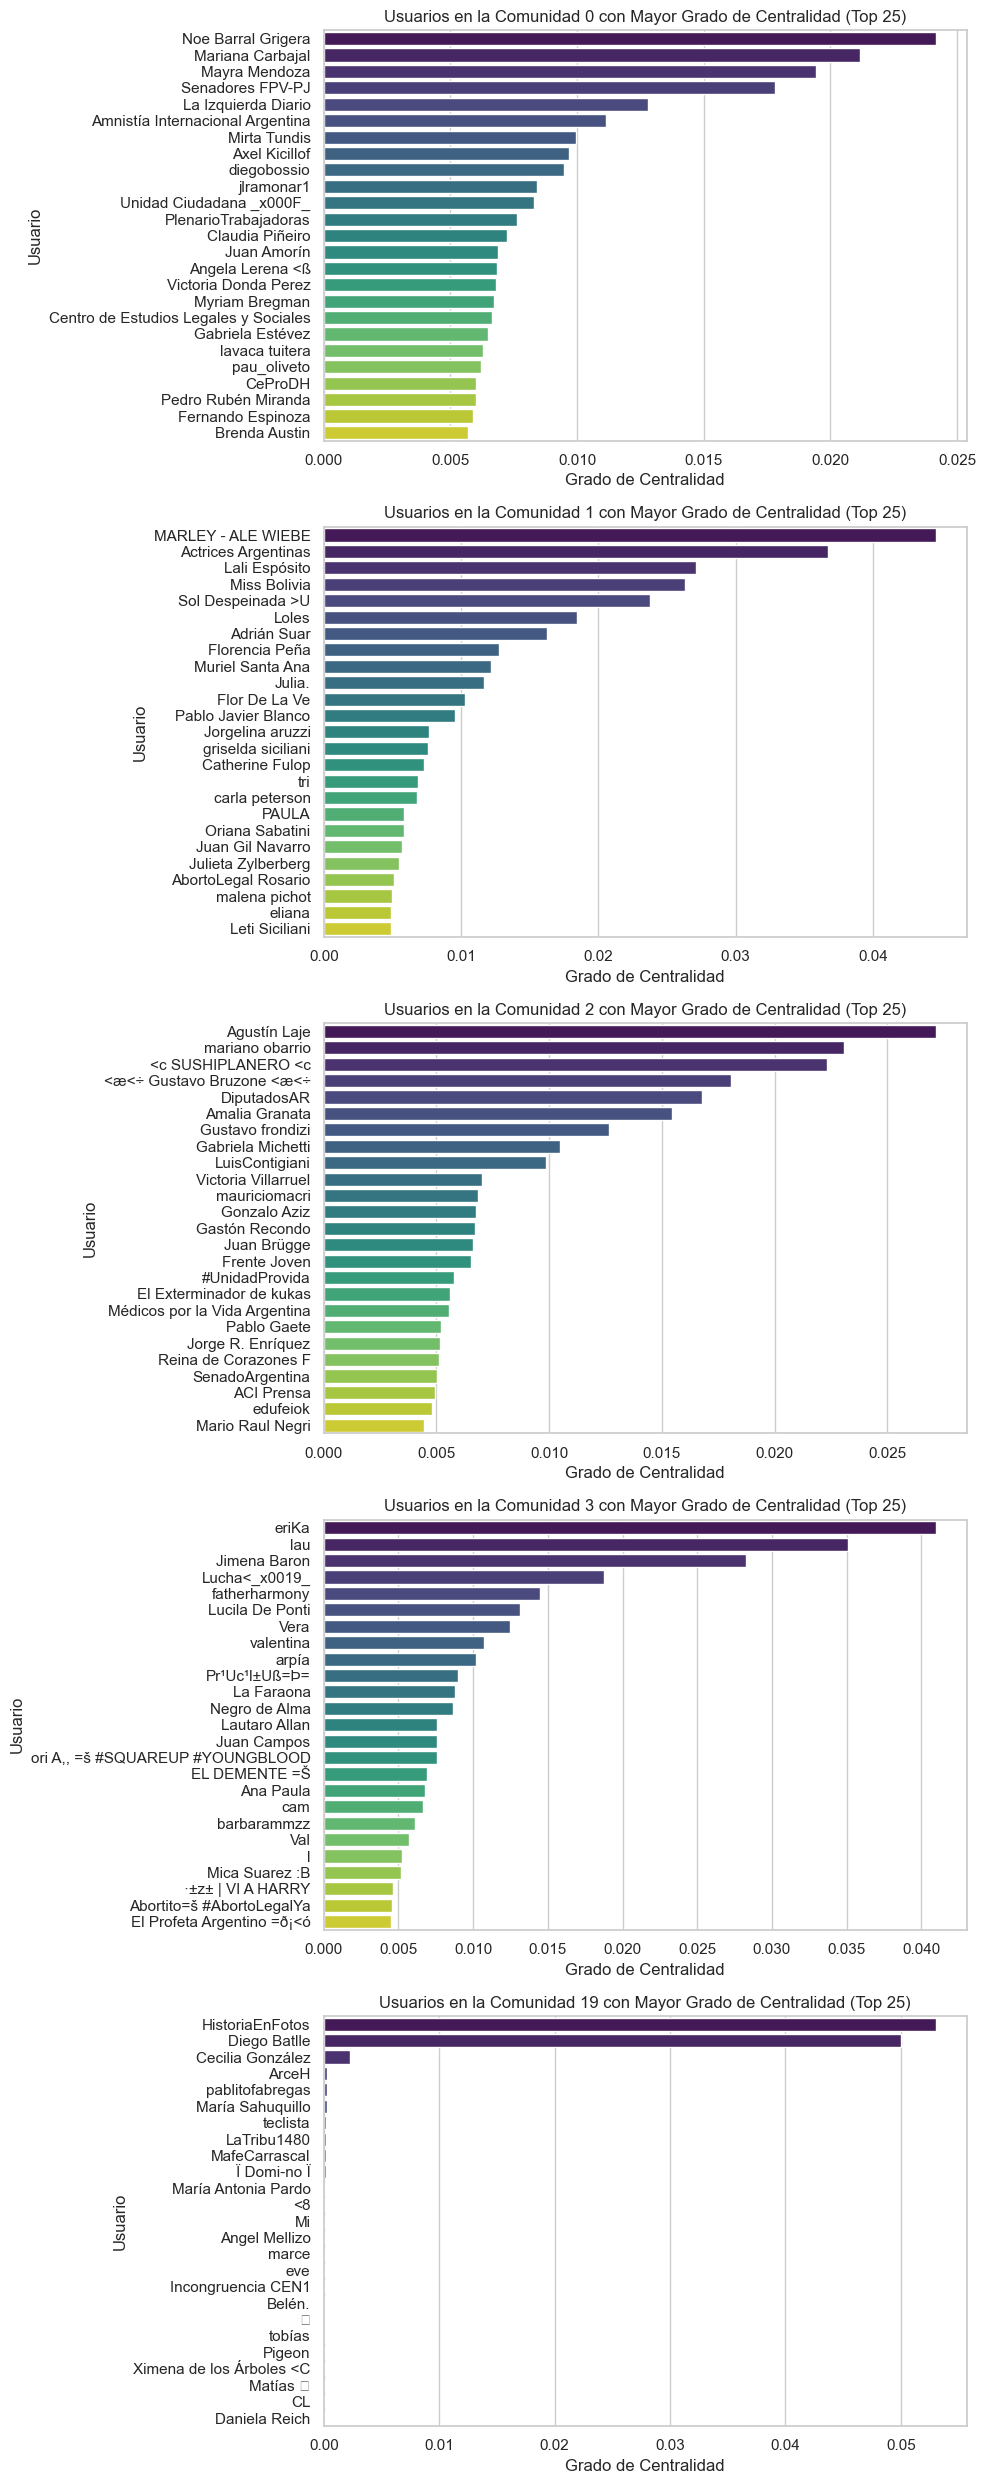

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico para cada comunidad
comunidades_unicas = filtered_comunidades['comunidad'].unique()

# Configurar el estilo de Seaborn
sns.set(style='whitegrid')

# Crear una figura con subgráficos
fig, axes = plt.subplots(nrows=len(comunidades_unicas), ncols=1, figsize=(10, 5 * len(comunidades_unicas)))

for ax, comunidad in zip(axes, comunidades_unicas):
    # Filtrar los datos para la comunidad actual
    data_comunidad = filtered_comunidades[filtered_comunidades['comunidad'] == comunidad]
    
    # Ordenar los usuarios por grado de centralidad de forma descendente
    data_comunidad = data_comunidad.sort_values('degree_centrality', ascending=False)
    
    # Seleccionar solo los 20 usuarios con mayor grado de centralidad
    top_20 = data_comunidad.head(25)
    
    # Crear un gráfico de barras
    sns.barplot(x='degree_centrality', y='user_name', data=top_20, ax=ax, palette='viridis', legend=False)
    
    # Añadir etiquetas y título
    ax.set_xlabel('Grado de Centralidad')
    ax.set_ylabel('Usuario')
    ax.set_title(f'Usuarios en la Comunidad {comunidad} con Mayor Grado de Centralidad (Top 25)')

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


DataFrame df_top contiene el 15% de los nodos con mayor grado de centralidad para cada comunidad

In [26]:
import pandas as pd

# Crear una lista para almacenar los DataFrames de las comunidades
dfs_mayor_centralidad = []

# Obtener las comunidades únicas
comunidades_unicas = filtered_comunidades['comunidad'].unique()

for comunidad in comunidades_unicas:
    # Filtrar los datos para la comunidad actual
    data_comunidad = filtered_comunidades[filtered_comunidades['comunidad'] == comunidad]
    
    # Ordenar los usuarios por grado de centralidad de forma descendente
    data_comunidad = data_comunidad.sort_values('degree_centrality', ascending=False)
    
    # Calcular el número de nodos a mantener (15%)
    num_nodos = len(data_comunidad)
    num_nodos_a_mantener = int(num_nodos * 0.15)  # Mantener el 15%
    
    # Seleccionar el 15% de los nodos con mayor grado de centralidad
    top_half = data_comunidad.head(num_nodos_a_mantener)
    
    # Agregar el DataFrame filtrado a la lista
    dfs_mayor_centralidad.append(top_half)

# Concatenar todos los DataFrames filtrados en uno solo
df_top = pd.concat(dfs_mayor_centralidad, ignore_index=True)

# Mostrar el DataFrame final
print(df_top)


                    user_name  comunidad  degree_centrality
0          Noe Barral Grigera          0           0.024182
1            Mariana Carbajal          0           0.021176
2               Mayra Mendoza          0           0.019440
3            Senadores FPV-PJ          0           0.017802
4         La Izquierda Diario          0           0.012794
...                       ...        ...                ...
25481                      kè         19           0.000004
25482             sololectura         19           0.000004
25483  vem hexa filha da puta         19           0.000004
25484              Envy Adams         19           0.000004
25485               Solange 🙆         19           0.000004

[25486 rows x 3 columns]


In [27]:
df_top['comunidad'].value_counts(normalize=True)

comunidad
3     0.275485
2     0.237935
0     0.213686
1     0.204230
19    0.068665
Name: proportion, dtype: float64

Construimos tabla **comunidades_completo** combinamos las tablas **datos_junio** y **df_top_half** en  'user_name' 

In [33]:
# Hacer un merge entre datos_junio y df_top_half usando la columna 'user_name'
comunidades_completo = pd.merge(datos_junio, df_top[['user_name', 'comunidad', 'degree_centrality']], on='user_name', how='inner')
# Ordenar el DataFrame
comunidades_ordenadas = comunidades_completo.sort_values(
    by=['comunidad', 'degree_centrality'], 
    ascending=[True, False]  # Ascendente para 'comunidad' y Descendente para 'degree_centrality'
)
comunidades_completo.to_csv("G:/Unidades compartidas/Rocío doctorado/Proyecto NLP/Datos/comunidades_muestreo", index=False)

# Mostrar el DataFrame resultante
comunidades_completo


,retweet_count,full_text,posicion,user_name,user_id,mencion,retweet,user_name_mencion,comunidad,degree_centrality
0,14,RT @PTSarg: Contamos con una ventaja que ellos...,si,Luciana HL,3130302891,[PTSarg],True,[PTS],0,0.000266
1,0,En el fondo lo que les jode es nuestra liberta...,si,Luz Scarpati,2999619141,None,False,None,0,0.000154
2,308,RT @femialborto: A vos que decís #Salvemoslasd...,si,niña de tilcara🌰,828222093804371968,[femialborto],True,[Abortencia],3,0.000077
3,1369,RT @CampAbortoLegal: Diputadxs: ¿Qué significa...,si,Iaru,2933415531,[CampAbortoLegal],True,[#13JAbortoLegal =š],1,0.000081
4,16,RT @CarrioJovenes: Que no coincidamos en el te...,si,mau 💚,291352706,"[CarrioJovenes, ElisaCarrio]",True,"[Jóvenes con Carrió., ElisaCarrio]",2,0.000056
...,...,...,...,...,...,...,...,...,...,...
503335,10,RT @NoAlAborto19: @danielscioli me bloqueo por...,no,Claudio Sustaita,882375374553985024,"[NoAlAborto19, danielscioli]",True,"[No Al Aborto, danielscioli]",2,0.000566
503336,36,RT @unidadprovida: “Hoy nuestra deuda es con l...,no,Marila,795289693898371073,[unidadprovida],True,[#UnidadProvida],2,0.000180
503337,115,"RT @lasmarias1234: #ArgentinaEsProvida"" #NoAlA...",no,Lis R. SAre,872612162367361025,[lasmarias1234],True,[Médicos por la Vida Argentina],2,0.000060
503338,174,RT @marianoobarrio: Esta inmensa maravilla fue...,no,Líbranos_del_Mal,950420828608491520,[marianoobarrio],True,[mariano obarrio],2,0.000377


MAtriz de confusion entre postura y comunidades

In [32]:
import pandas as pd

# Supongamos que ya tienes un DataFrame llamado 'filtado'

# Crear la tabla de contingencia con los porcentajes
tabla_porcentaje = pd.crosstab(comunidades_completo['comunidad'], comunidades_completo['posicion'], normalize='index') * 100

#tabla_porcentaje = pd.crosstab(filtrado['comunidad'], filtrado['posicion']) 

# Mostrar la tabla de contingencia con porcentajes
print(tabla_porcentaje)


posicion          no         si
comunidad                      
0           4.023465  95.976535
1           6.556139  93.443861
2          77.994101  22.005899
3           6.580574  93.419426
19          4.588141  95.411859


## Muestreo por comunidades

In [2]:
import pandas as pd
comunidades_muestreo = pd.read_csv('g:/Unidades compartidas/Rocío doctorado/Proyecto NLP/Datos/comunidades_muestreo.csv')
comunidades_muestreo

c:\Users\rocio\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\rocio\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\rocio\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,Unnamed: 0,retweet_count,full_text,posicion,user_name,user_id,mencion,retweet,user_name_mencion,comunidad,degree_centrality
0,9732,1223,RT @prmirandaMza: Debido a las preguntas sobre...,si,Noe Barral Grigera,158497464,['prmirandaMza'],True,['Pedro Rubén Miranda'],0,0.024182
1,18836,269,"RT @carlapetersonA: Valery Giscard d'Estaing, ...",si,Noe Barral Grigera,158497464,['carlapetersonA'],True,['carla peterson'],0,0.024182
2,33763,155,RT @princesamonto: La maternidad es un viaje p...,si,Noe Barral Grigera,158497464,['princesamonto'],True,['perez =š #AbortoLegalYa'],0,0.024182
3,37335,5,"RT @soifer: ""Dondequiera que haya una injustic...",si,Noe Barral Grigera,158497464,['soifer'],True,['Alejandro Soifer'],0,0.024182
4,49691,5,Persona que se loguéo desde Armenia para banca...,si,Noe Barral Grigera,158497464,NaN,False,NaN,0,0.024182
...,...,...,...,...,...,...,...,...,...,...,...
503335,450907,30,RT @AristeguiOnline: ⚡ ¡#AbortoLegal en #Argen...,si,David Solis,28586701,['AristeguiOnline'],True,['AristeguiOnline'],19,0.000004
503336,454416,43015,"RT @HistoriaEnFotos: Argentina, 1984. Argentin...",si,Aɢᴜꜱᴛɪɴᴀ,2205630661,['HistoriaEnFotos'],True,['HistoriaEnFotos'],19,0.000004
503337,457984,43037,"RT @HistoriaEnFotos: Argentina, 1984. Argentin...",si,celia,728071704,['HistoriaEnFotos'],True,['HistoriaEnFotos'],19,0.000004
503338,486107,1,RT @NeuroTales: Si en unos años mi hija me dij...,si,Lala Palooza,529061588,['NeuroTales'],True,"['Bitch Please, PhD(?)!']",19,0.000004


In [3]:
comunidades_muestreo=comunidades_muestreo[['full_text', 'posicion', 'user_name', 'comunidad']]
comunidades_muestreo.head(2)

,full_text,posicion,user_name,comunidad
0,RT @prmirandaMza: Debido a las preguntas sobre...,si,Noe Barral Grigera,0
1,"RT @carlapetersonA: Valery Giscard d'Estaing, ...",si,Noe Barral Grigera,0


In [4]:
import re

# eliminar el texto que comienza con "RT" y termina con ":"
comunidades_muestreo['full_text'] = comunidades_muestreo['full_text'].str.replace(r'^RT @\w+:', '', regex=True)

# Eliminar filas duplicadas basadas en la columna 'full_text'
comunidades_muestreo = comunidades_muestreo.drop_duplicates(subset='full_text')

# Revisamos las primeras filas para verificar que se eliminaron los duplicados
comunidades_muestreo.head()


C:\Users\rocio\AppData\Local\Temp/ipykernel_13976/1493009439.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comunidades_muestreo['full_text'] = comunidades_muestreo['full_text'].str.replace(r'^RT @\w+:', '', regex=True)


,full_text,posicion,user_name,comunidad
0,Debido a las preguntas sobre mi posición fren...,si,Noe Barral Grigera,0
1,"Valery Giscard d'Estaing, presidente de Franc...",si,Noe Barral Grigera,0
2,La maternidad es un viaje personal tan intens...,si,Noe Barral Grigera,0
3,"""Dondequiera que haya una injusticia ahí esta...",si,Noe Barral Grigera,0
4,Persona que se loguéo desde Armenia para banca...,si,Noe Barral Grigera,0


In [7]:
unicos_user_name=comunidades_muestreo.drop_duplicates(['user_name'])
unicos_user_name['orden'] = range(len(unicos_user_name))
muestras = []

for nombre_comunidad, grupo in unicos_user_name.groupby('comunidad'):
    # Tomar hasta 80 muestras aleatorias, asegurando que no haya duplicados
    n_samples = min(20, len(grupo))
    
    if n_samples > 0:  # Asegurarse de que hay usuarios disponibles
        muestra = grupo.sample(n=n_samples, random_state=42, replace=False)
        muestras.append(muestra)

# Combinar todas las muestras en un DataFrame
muestra_comunidades = pd.concat(muestras).reset_index(drop=True)

# Paso 4: Seleccionar solo las columnas 'user_name', 'full_text' y 'comunidad'
muestra_comunidades = muestra_comunidades[['user_name', 'full_text', 'comunidad']]

# Paso 5: Unir con el DataFrame original para recuperar el orden
muestra_comunidades = muestra_comunidades.merge(unicos_user_name[['user_name', 'orden']], on='user_name', how='left')

# Paso 6: Ordenar por la columna 'orden' y eliminar la columna 'orden'
muestra_comunidades = muestra_comunidades.sort_values(by='orden').drop(columns='orden')

# Paso 7: Agregar la columna 'Clasificacion' como vacía
muestra_comunidades['Clasificacion'] = ''

# Paso 8: Reordenar las columnas para que 'comunidad' esté al principio
muestra_comunidades = muestra_comunidades[['comunidad', 'user_name', 'full_text', 'Clasificacion']]

# Supongamos que ya tienes tu DataFrame llamado muestra_comunidades
muestra_comunidades = muestra_comunidades.sample(frac=1)

muestra_comunidades

C:\Users\rocio\AppData\Local\Temp/ipykernel_13976/2563105656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unicos_user_name['orden'] = range(len(unicos_user_name))


,comunidad,user_name,full_text,Clasificacion
19,0,CeProDH,#AbortoLegalYa Salgamos a exigirlo a las calle...,
64,3,stirlingite,Esperanzas a full por el 13J #AbortoLegalYa,
57,2,Maria del Carmen,Ustedes vieron toda la ideología de género qu...,
47,2,Marce Cantero,"@LuisContigiani gracias! Lo están linchando, q...",
15,0,💚TaTiaNoVa KoMaNeChi💚,"Los ""pro vida"" y/o los que están en contra de...",
...,...,...,...,...
88,19,Sebastian J Pereiro,Hoy es necesario respetar a quien piensa disti...,
61,3,Chini Morales,La buena noticia es #QueElAbortoSeaLey no sign...,
78,3,fiorella,"Seamos realistas, las leyes deben adaptarse a...",
51,2,Viviana ÁLVAREZ,@Kicillofok Somos muchos más quienes nos mostr...,


In [8]:
import pandas as pd
from openpyxl import load_workbook

# Supongamos que `muestra_comunidades` es el DataFrame ya procesado
# Definir las columnas que quieres guardar
columns_to_save = ['user_name', 'full_text', 'Clasificacion']

# Especificar la ruta completa del archivo
ruta = r'G:\Unidades compartidas\Rocío doctorado\Proyecto NLP\Datos\muestra_comunidad_ultimo.xlsx'

# Guardar el DataFrame en un archivo Excel con las hojas 'Vanesa', 'Rocio' y 'Comunidades'
with pd.ExcelWriter(ruta, engine='openpyxl') as writer:
    # Guardar las hojas 'Vanesa' y 'Rocio' con las columnas seleccionadas
    muestra_comunidades[columns_to_save].to_excel(writer, sheet_name='Vanesa', index=True)
    muestra_comunidades[columns_to_save].to_excel(writer, sheet_name='Rocio', index=True)
    
    # Guardar la hoja 'Comunidades' con solo la columna 'comunidad'
    muestra_comunidades[['comunidad']].to_excel(writer, sheet_name='Comunidades', index=False)

# Ahora cargamos el archivo de Excel para modificarlo y agregar el texto final
book = load_workbook(ruta)

# Agregar el texto al final de las hojas 'Vanesa' y 'Rocio'
for sheet_name in ['Vanesa', 'Rocio']:
    sheet = book[sheet_name]
    last_row = sheet.max_row + 2  # +2 para dar espacio
    sheet.cell(row=last_row, column=1).value = 'En la hoja comunidad aparece la comunidad de cada tweet'

# Guardar nuevamente el archivo Excel
book.save(ruta)

print("Archivo guardado con éxito en la ruta especificada.")



Archivo guardado con éxito en la ruta especificada.


Matriz de confusion entre evaluacion anecdotica y comunidades

In [47]:
evaluacion_anecdotica=pd.read_excel('G:/Unidades compartidas/Rocío doctorado/Proyecto NLP/Datos/muestra_comunidad_ultimo.xlsx'
                                    , sheet_name='Rocio')

In [48]:
evaluacion_anecdotica.columns=['Indice_tweet', 'user_name', 'full_text', 'Eval_anecdotica', 'Comunidad']

In [49]:
import pandas as pd

# Supongamos que ya tienes un DataFrame llamado 'filtado'

# Crear la tabla de contingencia con los porcentajes
tabla_porcentaje = pd.crosstab(evaluacion_anecdotica['Comunidad'], evaluacion_anecdotica['Eval_anecdotica'], normalize='index') * 100

#tabla_porcentaje = pd.crosstab(filtrado['comunidad'], filtrado['posicion']
# Mostrar la tabla de contingencia con porcentajes
print(tabla_porcentaje)

Eval_anecdotica     I     N      S
Comunidad                         
0.0              10.0   5.0   85.0
1.0               5.0   0.0   95.0
2.0              10.0  80.0   10.0
3.0               0.0   5.0   95.0
19.0              0.0   0.0  100.0


In [50]:
def asignar_postura(comunidad):
    if comunidad in [0, 1, 3, 19]:
        return 1
    elif comunidad == 2:
        return 0
    else:
        return np.nan  # Para manejar cualquier otro caso

# Crear la nueva columna 'postura'
comunidades_completo['postura'] = comunidades_completo['comunidad'].apply(asignar_postura)
comunidades_completo['postura'].value_counts(normalize=True)


postura
1    0.649066
0    0.350934
Name: proportion, dtype: float64

In [51]:
comunidades_completo.to_csv('G:/Unidades compartidas/Rocío doctorado/Proyecto NLP/Datos/comunidades.csv')